# Introduction
An ad-tech company recently introduced a new impression bidding model for their online advertising campaigns, Average Bidding, as an alternative to their existing bidding model, Maximum Bidding. 

Regina Corporation, a client running a retargeting advertising campaign using the Maximum Bidding model, has decided to test this new bidding model and wants to conduct an A/B test to understand if Average Bidding performs better than Maximum Bidding.

# Experiment Design
* **Null Hypotheses**: No difference in performance between Average Bidding and Maximum Bidding
* **Alternative Hypothesis**: Significant difference in performance between Average Bidding and Maximum Bidding
* **Subject/Unit of Diversion**: Randomized 50/50 split of site visitor cookies
* **Target Population**: Site visitors from the last 90 days
* **Minimum Sample Size Per Variation**: 54,359
* **Metrics**: CTR, CR, CPC, CPA
* **Test Duration**: 1 month
* **Practical Significance Levels**:
    * CTR: 1%
    * CR: 0.5%
    * CPC: 0.20 USD
    * CPA: 0.75 USD
* **α** = 0.05
* **β** = 0.2
* Campaigns are run simultaneously and the audience is split randomly to account for seasonality and other confounding variables
* The change being measured is not a user-facing change, so Primacy and Novelty effects are not relevant

### Sample Size Calculation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

# Baseline conversion rate for retargeting campaigns for Regina Corporation
baseline_cr = 0.095
min_detectable_effect = 0.005
p2 = baseline_cr + min_detectable_effect
alpha = 0.05 
beta = 0.2 
alpha_zscore = -1.9599 
beta_zscore = -0.8416

n = (((alpha_zscore * np.sqrt(2 * baseline_cr * (1 - baseline_cr))) + (beta_zscore * np.sqrt(baseline_cr * (1 - baseline_cr) + p2 * (1 - p2))))**2) / (abs(p2 - baseline_cr)**2)
print('Sample Size: ', round(n, 0))

Sample Size:  54359.0


# Run Experiment & Check Data
We have run the experiment for 1 month, and now it is time to perform checks to make sure the experiment ran as intended, before proceeding to analyze the results.

In [2]:
control = pd.read_csv('/kaggle/input/example-dataset-for-ab-test/control_group.csv', delimiter=';')
control['Date'] = pd.to_datetime(control['Date'], dayfirst=True)

# Most data for 2019-08-05 missing, so dropped row
control.drop(labels=[4], axis=0, inplace=True)
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


In [3]:
test = pd.read_csv('/kaggle/input/example-dataset-for-ab-test/test_group.csv', delimiter=';')
test['Date'] = pd.to_datetime(test['Date'], dayfirst=True)
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


### Calculate Metrics

In [4]:
control['CTR'] = control['# of Website Clicks']/control['# of Impressions']
control['CR'] = control['# of Purchase']/control['# of Website Clicks']
control['CPC'] = control['Spend [USD]']/control['# of Website Clicks']
control['CPA'] = control['Spend [USD]']/control['# of Purchase']

test['CTR'] = test['# of Website Clicks']/test['# of Impressions']
test['CR'] = test['# of Purchase']/test['# of Website Clicks']
test['CPC'] = test['Spend [USD]']/test['# of Website Clicks']
test['CPA'] = test['Spend [USD]']/test['# of Purchase']

control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,CTR,CR,CPC,CPA
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.084835,0.088084,0.324971,3.689320
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.067003,0.063009,0.216646,3.438356
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.049411,0.057160,0.360018,6.298387
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.042057,0.110930,0.632953,5.705882
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,0.036928,0.189672,0.765392,4.035340


In [5]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,CTR,CR,CPC,CPA
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255,0.076814,0.083937,0.990125,11.796078
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677,0.046238,0.145373,0.545845,3.754801
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578,0.112221,0.073304,0.299937,4.091696
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340,0.053741,0.080645,0.642789,7.970588
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768,0.051297,0.130991,0.391779,2.990885


## Spend

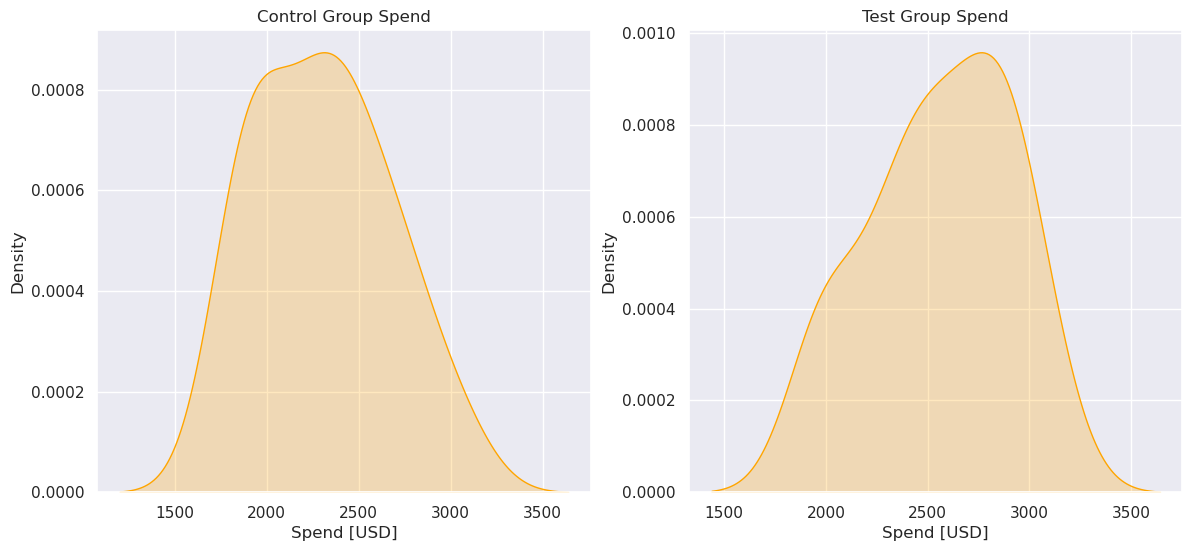

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

ax1 = sns.kdeplot(control['Spend [USD]'], ax=ax[0], color='orange', fill=True)
ax2 = sns.kdeplot(test['Spend [USD]'], ax=ax[1], color='orange', fill=True)
ax1.set_title('Control Group Spend')
ax2.set_title('Test Group Spend')

plt.show()

## Impressions

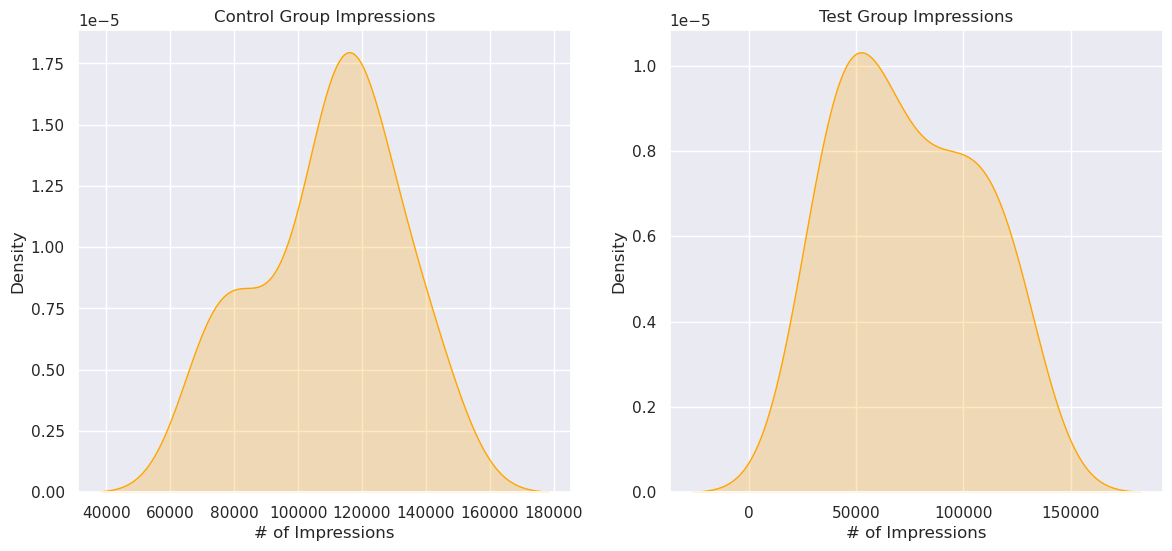

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

ax1 = sns.kdeplot(control['# of Impressions'], ax=ax[0], color='orange', fill=True)
ax2 = sns.kdeplot(test['# of Impressions'], ax=ax[1], color='orange', fill=True)
ax1.set_title('Control Group Impressions')
ax2.set_title('Test Group Impressions')

plt.show()

## Clicks

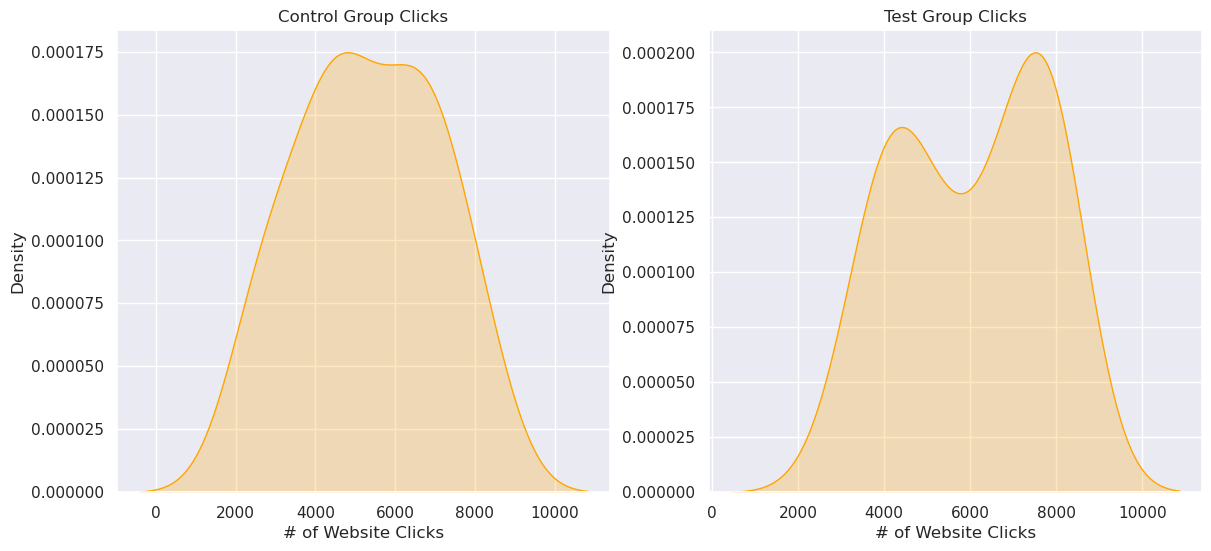

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

ax1 = sns.kdeplot(control['# of Website Clicks'], ax=ax[0], color='orange', fill=True)
ax2 = sns.kdeplot(test['# of Website Clicks'], ax=ax[1], color='orange', fill=True)
ax1.set_title('Control Group Clicks')
ax2.set_title('Test Group Clicks')

plt.show()

## Purchases

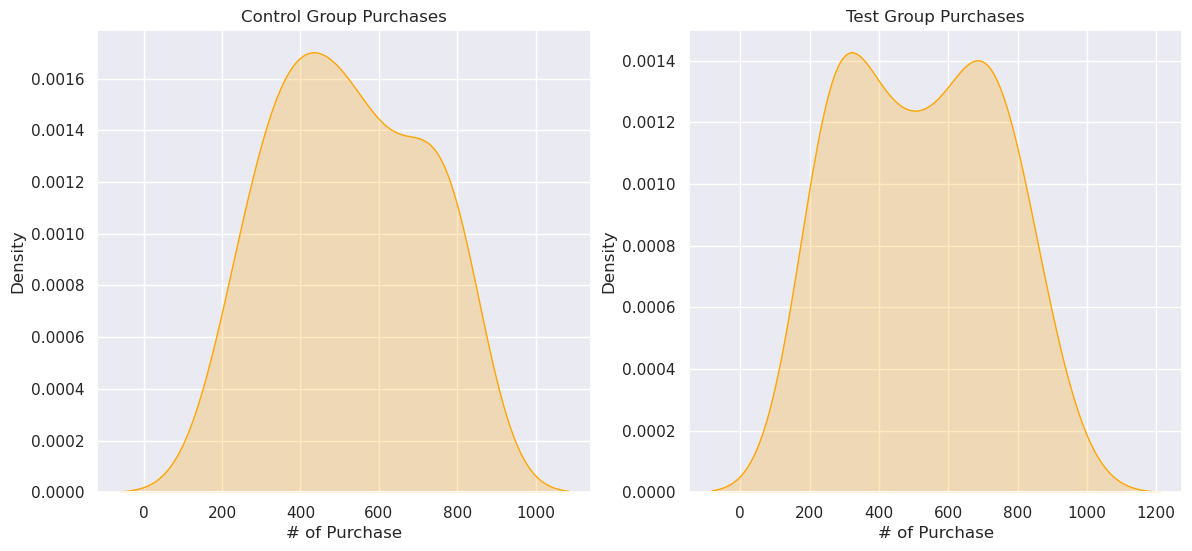

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

ax1 = sns.kdeplot(control['# of Purchase'], ax=ax[0], color='orange', fill=True)
ax2 = sns.kdeplot(test['# of Purchase'], ax=ax[1], color='orange', fill=True)
ax1.set_title('Control Group Purchases')
ax2.set_title('Test Group Purchases')

plt.show()

For all of the metrics we are concerned with, the volume for the Control and Test groups is comparable, and seem to mostly follow a normal distribution. 

Typically at this stage we would also perform sanity checks on invariant metrics, or metrics that we expect to be the same between both groups, to ensure that the experiment ran as intended and that the quality of the data is as expected.
This time however the change we are measuring is at the beginning of the customer funnel, and so we must make do with using similar levels of volume.

Now let's analyze the results.

# Analysis of Results
First, let's take a look at totals and metrics for each campaign.

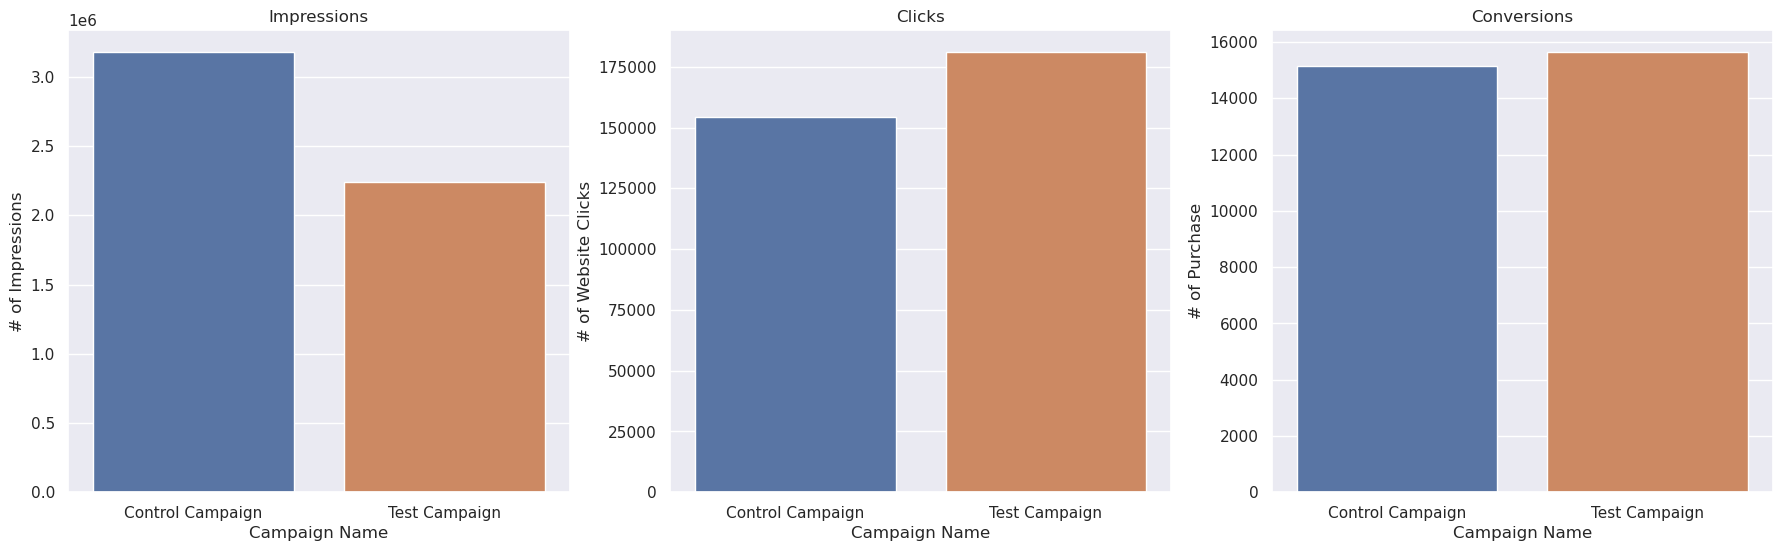

In [10]:
data_all = pd.concat([control, test])
fig, ax = plt.subplots(ncols=3, figsize=(22,6))
ax1 = sns.barplot(data=data_all, x='Campaign Name', y='# of Impressions', errorbar=('ci', False), ax=ax[0], estimator='sum')
ax2 = sns.barplot(data=data_all, x='Campaign Name', y='# of Website Clicks', errorbar=('ci', False), ax=ax[1], estimator='sum')
ax3 = sns.barplot(data=data_all, x='Campaign Name', y='# of Purchase', errorbar=('ci', False), ax=ax[2], estimator='sum')

ax1.set_title('Impressions')
ax2.set_title('Clicks')
ax3.set_title('Conversions')

plt.show()

It looks like the Control campaign had quite a few more total impressions, while the Test campaign had more clicks, and conversions look nearly equal.

Now let's take a look at the metrics.

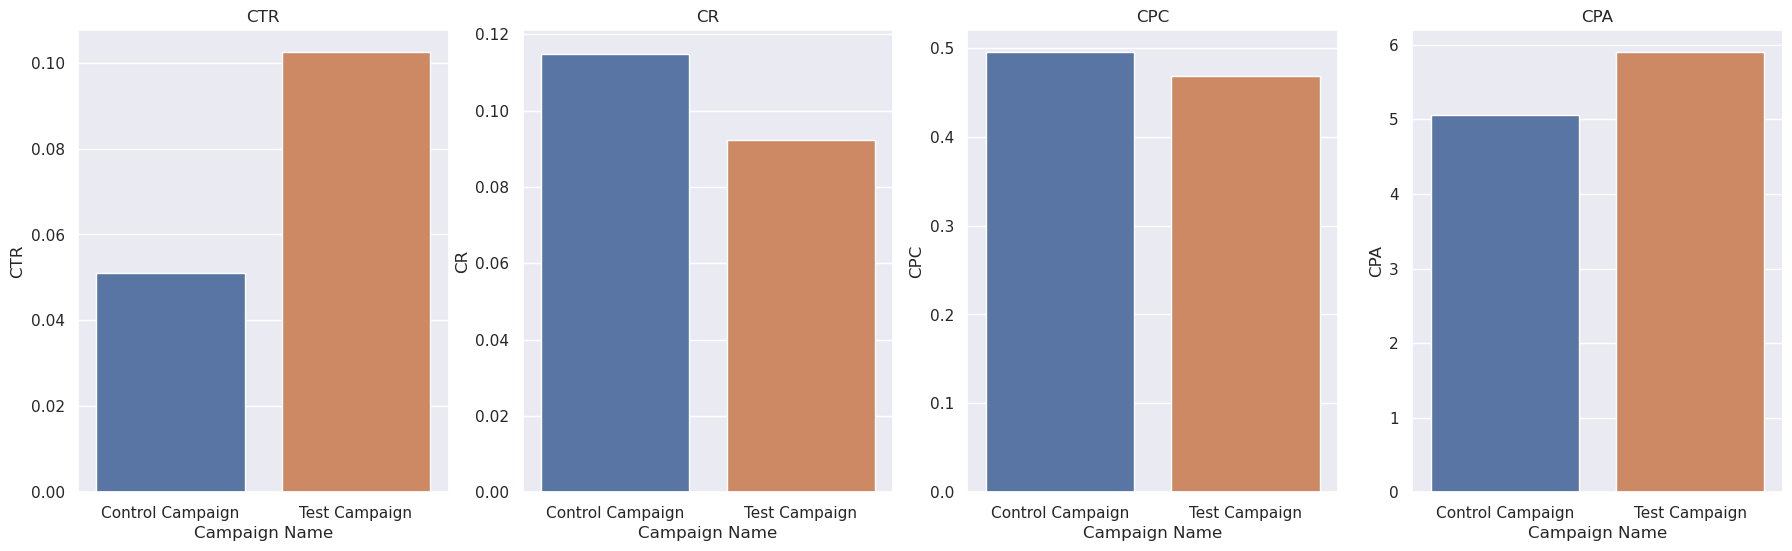

In [11]:
data_all = pd.concat([control, test])
fig, ax = plt.subplots(ncols=4, figsize=(22,6))
ax1 = sns.barplot(data=data_all, x='Campaign Name', y='CTR', errorbar=('ci', False), ax=ax[0], estimator='mean')
ax2 = sns.barplot(data=data_all, x='Campaign Name', y='CR', errorbar=('ci', False), ax=ax[1], estimator='mean')
ax3 = sns.barplot(data=data_all, x='Campaign Name', y='CPC', errorbar=('ci', False), ax=ax[2], estimator='mean')
ax4 = sns.barplot(data=data_all, x='Campaign Name', y='CPA', errorbar=('ci', False), ax=ax[3], estimator='mean')

ax1.set_title('CTR')
ax2.set_title('CR')
ax3.set_title('CPC')
ax4.set_title('CPA')

plt.show()

The Test campaign had a much higher CTR and a lower CPC, while the Control campaign had a higher CR and a lower CPA.

At first glance it seems like we already know the results. But how do we know that this is representative of how the results would be if we were to run both campaigns for a longer period?

To estimate that and develop more certainty behind our results, we need to use statistical tests to account for variance in the data, paired with our practical significance levels.

In [12]:
# Function to calculate confidence interval, where measures A and B are the numerator and denominator for the metric
def ratio_diff_confidence_interval(metric, measure_a, measure_b, alpha):
    p_pool = (control[measure_a].sum() + test[measure_a].sum())/(control[measure_b].sum() + test[measure_b].sum())
    pool_se = np.sqrt(p_pool * (1-p_pool) * (1/control[measure_b].sum() + 1/test[measure_b].sum()))

    metric_diff = (test[measure_a].sum()/test[measure_b].sum()) - (control[measure_a].sum()/control[measure_b].sum())
    margin_of_error = stats.norm.ppf(1-alpha/2) * pool_se

    ci_lower_bound = metric_diff - margin_of_error
    ci_upper_bound = metric_diff + margin_of_error

    print("The difference in {0} between groups is {1}".format(metric, round(metric_diff, 4)))
    print("Confidence Interval: [", round(ci_lower_bound, 4),",",round(ci_upper_bound, 4), "]")
    print()
    if (ci_lower_bound > 0) or (ci_upper_bound < 0):
        print('Reject Null Hypothesis, statistically significant difference between Control and Test {}'.format(metric))
    else:
        print('Unable to reject Null Hypothesis, no statistically significant difference between Control and Test {}'.format(metric))
        
    
def cont_diff_confidence_interval(metric, alpha):
    se = np.sqrt((control[metric].std()**2/control[metric].count() + test[metric].std()**2/test[metric].count()))

    metric_diff = test[metric].mean() - control[metric].mean()
    margin_of_error = stats.norm.ppf(1-alpha/2) * se

    ci_lower_bound = metric_diff - margin_of_error
    ci_upper_bound = metric_diff + margin_of_error

    print("The difference in {0} between groups is {1}".format(metric, round(metric_diff, 4)))
    print("Confidence Interval: [", round(ci_lower_bound, 4),",",round(ci_upper_bound, 4), "]")
    print()
    if (ci_lower_bound > 0) or (ci_upper_bound < 0):
        print('Reject Null Hypothesis, statistically significant difference between Control and Test {}'.format(metric))
    else:
        print('Unable to reject Null Hypothesis, no statistically significant difference between Control and Test {}'.format(metric))

With the confidence interval functions we made above, we can test if the difference in various metrics between the two campaigns is statistically significant by checking if the confidence interval for the difference contains 0 or not. 

If it does not, we can reject the Null Hypothesis that the difference between the 2 campaigns equals 0.

## CTR

In [13]:
ratio_diff_confidence_interval(metric='CTR', 
                    measure_a='# of Website Clicks', 
                    measure_b='# of Impressions', 
                    alpha=.05)

The difference in CTR between groups is 0.0323
Confidence Interval: [ 0.0319 , 0.0327 ]

Reject Null Hypothesis, statistically significant difference between Control and Test CTR


## CR

In [14]:
ratio_diff_confidence_interval(metric='CR', 
                    measure_a='# of Purchase', 
                    measure_b='# of Website Clicks', 
                    alpha=.05)

The difference in CR between groups is -0.0118
Confidence Interval: [ -0.0138 , -0.0099 ]

Reject Null Hypothesis, statistically significant difference between Control and Test CR


## CPC

In [15]:
cont_diff_confidence_interval(metric='CPC', alpha=.05)

The difference in CPC between groups is -0.0262
Confidence Interval: [ -0.1289 , 0.0765 ]

Unable to reject Null Hypothesis, no statistically significant difference between Control and Test CPC


## CPA

In [16]:
cont_diff_confidence_interval(metric='CPA', alpha=.05)

The difference in CPA between groups is 0.8473
Confidence Interval: [ -0.4169 , 2.1114 ]

Unable to reject Null Hypothesis, no statistically significant difference between Control and Test CPA


The results of our tests were as follows:

**CTR**: There was a statistically significant difference in CTR, with the Test campaign having a +3.23% higher CTR than the Control campaign. This was also higher than the practical significance level of 1%.

**CR**: There was a statistically significant difference in CR, with the Test campaign having a -1.18% lower CR than the Control campaign. This was also lower than the practical significance level of 0.5%.

**CPC**: There was no statistically significant difference in CPC, with the Test campaign having a -0.02 USD lower CPC than the Control campaign. This was also lower than the practical significance level of 0.20 USD.

**CPA**: There was no statistically significant difference in CPA, with the Test campaign having a +0.84 USD higher CPA than the Control campaign. This was also higher than the practical significance level of 0.75 USD.

# Conclusions & Next Steps
While the Maximum Bidding campaign resulted in a better CR, the Average Bidding campaign had a noticeably better CTR.

Also, while there was no significant difference in CPC between the campaigns, the CPA of the Average Bidding campaign was higher than the practical significance level set by Regina Corporation.

What does this mean? First, while we have conducted a valid experiment, we cannot make any firm assumptions about the results of this test without further testing in order to establish the reliability of the results.

What we can say is that the results of this test signal that we should test further. If the results prove reliable, it would seem that Maximum Bidding is the model Regina Corporation should use in its retargeting campaigns to maximize CR.

However, the higher CTR of Average Bidding may indicate that it may be a better bidding model for upper funnel awareness campaigns, where user engagement with the brand is the goal instead of conversion.

Regina Corporation might also want to do a deeper analysis of the difference in CPA to see if the Average Bidding model is more profitable.

#### Thank you so much for reading!